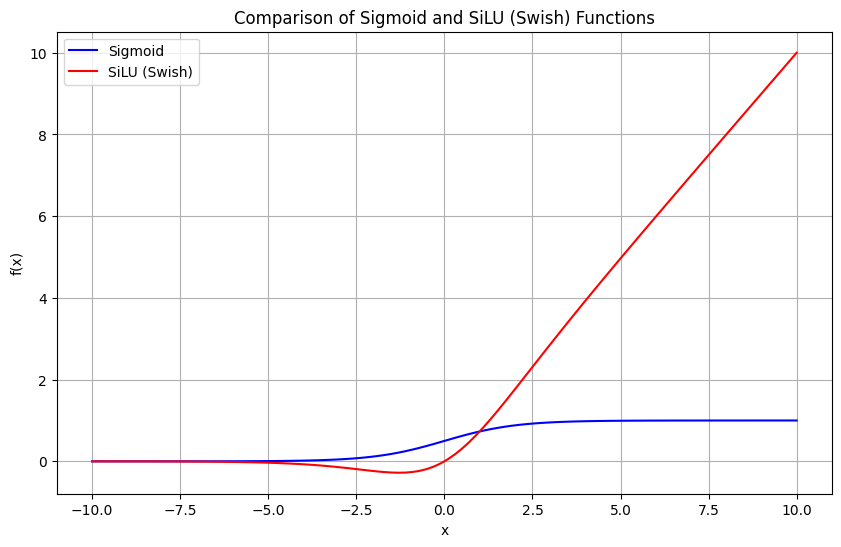

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Define the sigmoid and SiLU (Sigmoid Linear Unit, also known as Swish) functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def silu(x):
    return x / (1 + np.exp(-x))


# Generate a range of values from -10 to 10
x = np.linspace(-10, 10, 100)

# Compute the sigmoid and SiLU values for these x values
y_sigmoid = sigmoid(x)
y_silu = silu(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y_sigmoid, label='Sigmoid', color='blue')
plt.plot(x, y_silu, label='SiLU (Swish)', color='red')
plt.title('Comparison of Sigmoid and SiLU (Swish) Functions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
from xformers.ops.fmha.attn_bias import (
    AttentionBias,
    BlockDiagonalCausalMask,
    BlockDiagonalCausalWithOffsetPaddedKeysMask,
    BlockDiagonalMask,
)

import pandas as pd

In [6]:
col_dict = {0.0: '#68A357', float('-inf'): '#C97064'}
def color_cell(val):
    for val in col_dict:
        return 'background-color: %s' % col_dict[val]
    return ''

In [6]:
seq_lens = [7,5,6]
sliding_window_size = 3

mask = BlockDiagonalCausalMask.from_seqlens(seq_lens).make_local_attention(sliding_window_size)
print(mask)

batch_size = 1
total_seq_len = sum(seq_lens)
mask_tensor = mask.materialize((batch_size, total_seq_len, total_seq_len))


df = pd.DataFrame(mask_tensor[0, :,:].numpy())
df.style.applymap(color_cell)
df

BlockDiagonalCausalLocalAttentionMask(q_seqinfo=_SeqLenInfo(seqstart=tensor([ 0,  7, 12, 18], dtype=torch.int32), max_seqlen=7, min_seqlen=5, seqstart_py=[0, 7, 12, 18]), k_seqinfo=_SeqLenInfo(seqstart=tensor([ 0,  7, 12, 18], dtype=torch.int32), max_seqlen=7, min_seqlen=5, seqstart_py=[0, 7, 12, 18]), _batch_sizes=None, _window_size=3)


/var/folders/93/1rzwtwg956b99qtkd3h2j3_40000gn/T/ipykernel_25862/3269076900.py:13: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df.style.applymap(color_cell)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
1,0.0,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
2,0.0,0.0,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
3,-inf,0.0,0.0,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
4,-inf,-inf,0.0,0.0,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
5,-inf,-inf,-inf,0.0,0.0,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
6,-inf,-inf,-inf,-inf,0.0,0.0,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
7,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
8,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
9,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,0.0,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf


In [2]:
import torch

# Creating a tensor flat_cache_k of size (5, 3) filled with zeros
flat_cache_k = torch.zeros(5, 3, dtype=torch.int32)

# Creating a tensor xk of size (2, 3)
xk = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.int32)

# Indices where we want to copy elements in flat_cache_k
indices = torch.tensor([0, 2])

# Using index_copy_ to copy elements from xk into flat_cache_k at specified indices
flat_cache_k.index_copy_(0, indices, xk)

print(flat_cache_k)


tensor([[1, 2, 3],
        [0, 0, 0],
        [4, 5, 6],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)


In [4]:
import torch

# Creating a tensor flat_cache_k of size (5, 3) filled with zeros
flat_cache_k = torch.zeros(5, 3, dtype=torch.int32)

# Creating a tensor xk of size (2, 3)
xk = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.int32)

# Indices where we want to copy elements in flat_cache_k
indices = [0, 2]  # We want to update the 1st and 3rd rows

# Using assignment to copy elements from xk into flat_cache_k at specified indices
flat_cache_k[indices] = xk

print(flat_cache_k)


tensor([[1, 2, 3],
        [0, 0, 0],
        [4, 5, 6],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)


In [9]:
## BlockDiagonalMask

q_seqlens = [3, 5]
kv_seqlens = [10, 8] # (3 + 7, 5 + 3)
sliding_window_size = 3

mask = BlockDiagonalMask.from_seqlens(q_seqlens, kv_seqlens).make_local_attention_from_bottomright(sliding_window_size)

batch_size = 1
total_seq_len = sum(q_seqlens)
total_kv_seq_len = sum(kv_seqlens)
mask_tensor = mask.materialize((batch_size, total_seq_len, total_kv_seq_len))

df = pd.DataFrame(mask_tensor[0, :, :].numpy())
df.style.applymap(color_cell)
df

/var/folders/93/1rzwtwg956b99qtkd3h2j3_40000gn/T/ipykernel_58756/3122471603.py:15: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df.style.applymap(color_cell)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-inf,-inf,-inf,-inf,-inf,0.0,0.0,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
1,-inf,-inf,-inf,-inf,-inf,-inf,0.0,0.0,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
2,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,0.0,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
3,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,0.0,0.0,-inf,-inf,-inf,-inf
4,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,0.0,0.0,-inf,-inf,-inf
5,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,0.0,0.0,-inf,-inf
6,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,0.0,0.0,-inf
7,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,0.0,0.0


In [12]:
import torch

a = torch.empty(3, 3, dtype=torch.int32)
a

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)

In [1]:
from cache import RotatingBufferCache

dim = 4096
n_layers = 32
head_dim = 128
n_heads = 32
n_kv_heads = 32
window_size = 4096

cache = RotatingBufferCache(1, window_size,n_kv_heads, head_dim)
meta = cache.get_input_metadata([3,4,5])
meta

tensor([3, 4, 5])

In [4]:
import torch
a = torch.randn([3,4,1])
a[:3, 2:3,] = 1
a

tensor([[[-1.2843],
         [-0.5010],
         [ 1.0000],
         [-0.4769]],

        [[ 0.4335],
         [ 0.6196],
         [ 1.0000],
         [ 0.8906]],

        [[ 0.5469],
         [ 1.0499],
         [ 1.0000],
         [ 0.7315]]])

In [14]:
seqlen = [3,4,5,6]
a = torch.zeros((len(seqlen),), dtype=torch.long)
print(a)
b = [1,2,3,4]
a += torch.tensor(b, dtype=torch.long)
c = [1,2,3,4]
a += torch.tensor(c, dtype=torch.long)
print(a.tolist())

tensor([0, 0, 0, 0])
[2, 4, 6, 8]
